In [1]:
import numpy as np
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import Axes3D, proj3d

### Defining function f(x1,x2) = -cos(x₁²+x₂²+x₁x₂)

In [2]:
f= lambda x: -np.cos(x[0]**2 + x[1]**2 + x[0]*x[1])

### Plotting z = -cos(x₁²+x₂²+x₁x₂)

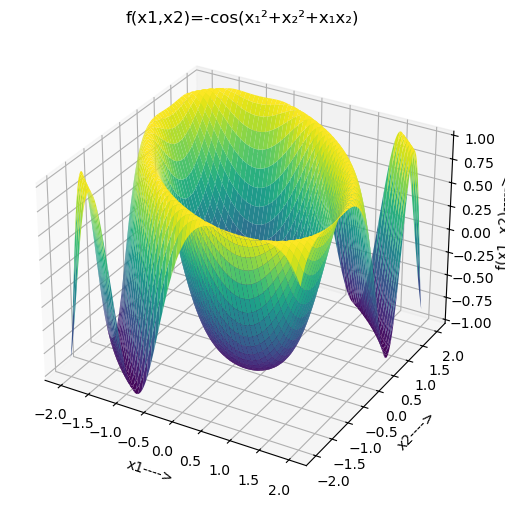

In [3]:
x1=np.linspace(-2,2,1000)
x2=np.linspace(-2,2,1000)
X1,X2= np.meshgrid(x1,x2)
Z=f([X1,X2])
fig = pt.figure(figsize=(6,10))
ax=fig.add_subplot(111,projection='3d') # 111 means grid of 1 row and 1 column and placed at 1st position
# Plot the surface
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
# fig.colorbar(surf, ax=ax, shrink=0.5)
ax.set_xlabel('x1---->')
ax.set_ylabel('x2---->')
ax.set_zlabel('f(x1, x2)----->')
ax.set_title('f(x1,x2)=-cos(x₁²+x₂²+x₁x₂)' )
pt.show()

### 1. Create a contour plot of f in the range [−2, 2] × [−2, 2] with Python.

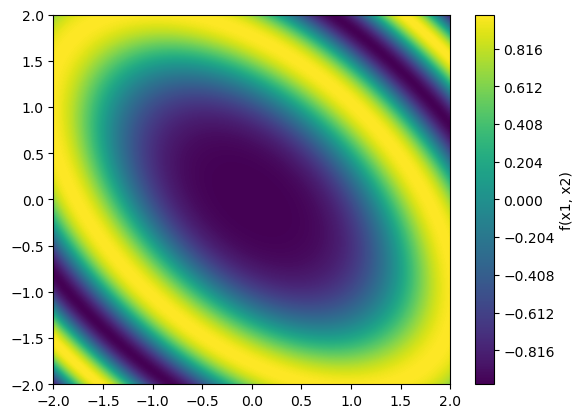

In [4]:
contour=pt.contourf(X1,X2,Z,levels=500,cmap='viridis')#contourf instead of contour so that completely fill contour values in continuous range
pt.colorbar(contour, label='f(x1, x2)')
pt.show()

### 2. Compute ∇f and Compute ∇²f

#### Installing necessary libraries 

In [5]:
!pip install numdifftools

In [6]:
import numdifftools as nd 

#### Computing gradient using library function

In [7]:
grad=nd.Gradient(f)
grad([1,2])

array([2.62794639, 3.28493299])

#### Computing gradient by defining our own function

In [151]:
def gradient_f(x):
    df_dx1 = (2*x[0] + x[1]) * np.sin(x[0]**2 + x[1]**2 + x[0]*x[1])
    df_dx2 = (2*x[1] + x[0]) * np.sin(x[0]**2 + x[1]**2 + x[0]*x[1])
    return np.array([df_dx1, df_dx2])

In [152]:
gradient_f([1,2])

array([2.62794639, 3.28493299])

#### Computing hessian matrix using Hessian function or we can use this logic ∇²f=∇(∇f)

In [10]:
hessian=nd.Hessian(f)
hessian([1,2])

array([[13.37640927, 15.73503169],
       [15.73503169, 20.16152956]])

In [11]:
hess_1=nd.Gradient(grad)
hess_1([1,2])

array([[13.37640927, 15.73503169],
       [15.73503169, 20.16152956]])

#### Computing Hessian Matrix by defining our own function

In [12]:
def hessian_f(x1, x2):
    df2_dx1x1 = np.cos(x1**2+x2**2+x1*x2)*(2*x1+x2)**2 + (2) * np.sin(x1**2 + x2**2 + x1*x2)
    df2_dx1x2 = np.cos(x1**2+x2**2+x1*x2)*(2*x1+x2)*(2*x2+x1) +np.sin(x1**2 + x2**2 + x1*x2)
    df2_dx2x2 = np.cos(x1**2+x2**2+x1*x2)*(2*x2+x1)**2 + (2) * np.sin(x1**2 + x2**2 + x1*x2)
    return np.array([[df2_dx1x1, df2_dx1x2], [df2_dx1x2, df2_dx2x2]])

In [13]:
hessian_f(1,2)

array([[13.37640927, 15.73503169],
       [15.73503169, 20.16152956]])

### Now, we define the restriction of f to Sr={(x₁,x₂)𝛜R² | x₁²+x₂²+x₁x₂<r} with r𝟄R, r>0, i.e. f|Sr:Sr->R,(x1, x2)→ f(x1, x2).

In [14]:
def restricted_function(r):
    f= lambda x: (-np.cos(x[0]**2 + x[1]**2 + x[0]*x[1]))*(x[0]**2+x[1]**2+x[0]*x[1]<r)
    return f

#### Plotting restricted function for r'=π/4

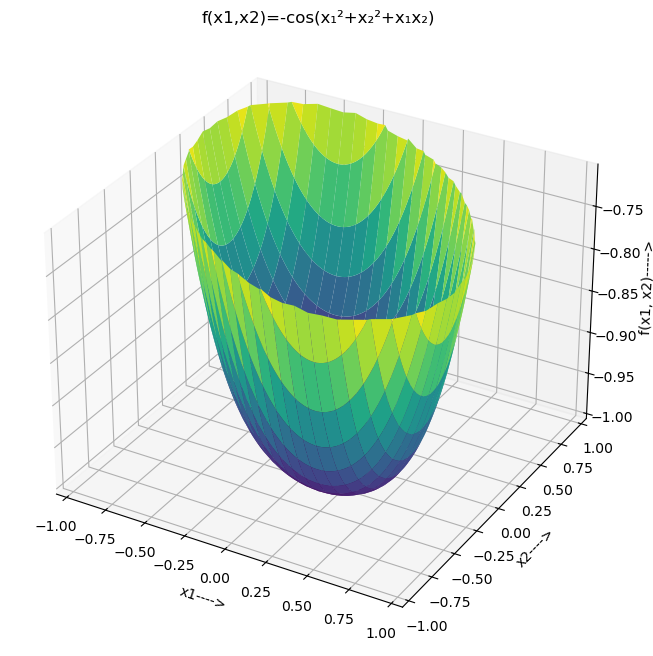

In [111]:
Z=restricted_function(np.pi/4)([X1,X2])
masked_Z = np.ma.masked_where(Z == 0, Z)
non_zero_indices = np.where(Z != 0)
masked_X1 = X1[non_zero_indices]
masked_X2 = X2[non_zero_indices]
fig = pt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d') # 111 means grid of 1 row and 1 column and placed at 1st position
# Plot the surface
surf = ax.plot_surface(X1, X2, masked_Z, cmap='viridis', edgecolor='none')
# fig.colorbar(surf, ax=ax, shrink=0.5)
ax.set_xlabel('x1---->')
ax.set_ylabel('x2---->')
ax.set_zlabel('f(x1, x2)----->')
ax.set_title('f(x1,x2)=-cos(x₁²+x₂²+x₁x₂)' )
pt.xlim(masked_X1.min(), masked_X1.max())
pt.ylim(masked_X2.min(), masked_X2.max())
pt.show()

### 4. Show that f|Sr with r = π/4 is convex.

#### From the graph only we can show that it is convex


### 5. Find the local minimum x* of f|Sr (Identify on the cotour plot)

#### By looking at graph its look like local minimum exist at point (0,0) Let's Verify

In [172]:
local_minimum=np.array([0,0])
nd.Gradient(restricted_function(np.pi/4))(local_minimum)

array([0., 0.])

In [115]:
hess_local_minimum=nd.Hessian(restricted_function(np.pi/4))(local_minimum)
hess_local_minimum

array([[0.00517876, 0.00414301],
       [0.00414301, 0.00517876]])

In [116]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [117]:
is_pos_def(hess_local_minimum)

True

#### Since gradient is zero at local_minimum and Hessian matrix is positive definite therefore the point is local_minimum

In [173]:
np.linalg.eigvals(hess_local_minimum)

array([0.00932177, 0.00103575])

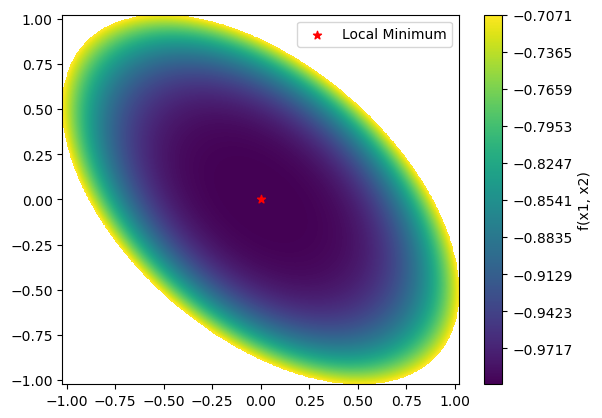

In [175]:
contour=pt.contourf(X1,X2,masked_Z,levels=1000,cmap='viridis')
pt.scatter(local_minimum[0],local_minimum[1],color='red',marker='*',label='Local Minimum')
pt.colorbar(contour, label='f(x1, x2)')
pt.xlim(masked_X1.min(), masked_X1.max())
pt.ylim(masked_X2.min(), masked_X2.max())
pt.legend()
pt.show()

#### 6. Is x* a global minimum of f?

### Yes
Because since f|Sr is a convex function and X* is a local minimum(satisfied both first order and second order condition) hence it is also Global Minimum

In [18]:
f= lambda x: x[0]**2+0.5*x[1]**2+x[0]*x[1]


(-2.0, 2.0)

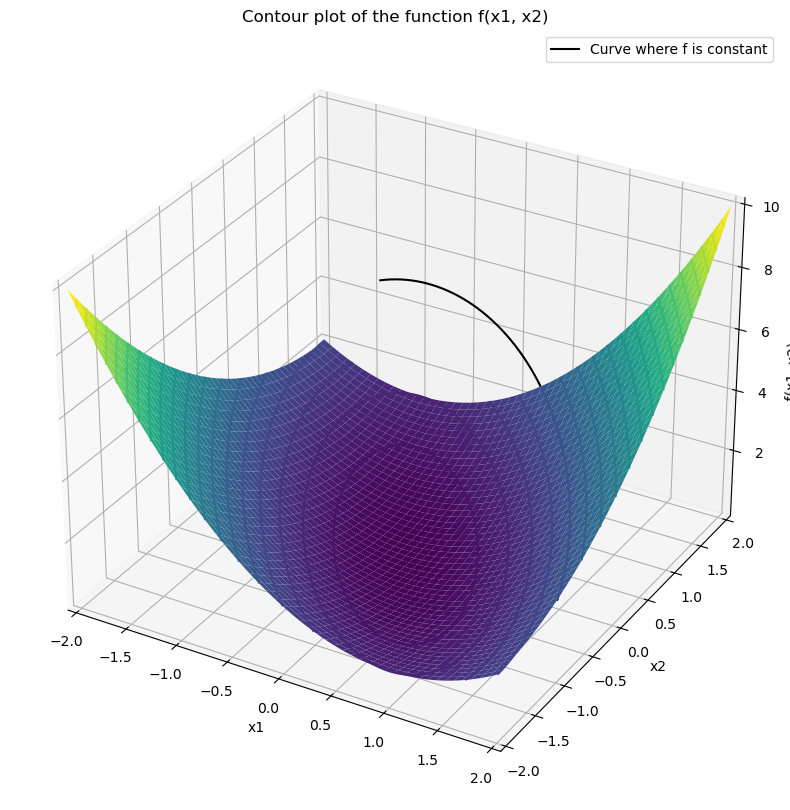

In [36]:
x1=np.linspace(-2,2,1000)
x2=np.linspace(-2,2,1000)
X1,X2= np.meshgrid(x1,x2)
Z=f([X1,X2])
fig = pt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d') # 111 means grid of 1 row and 1 column and placed at 1st position
# Plot the surface
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
# fig.colorbar(surf, ax=ax, shrink=0.5)
ax.set_xlabel('x1---->')
ax.set_ylabel('x2---->')
ax.set_zlabel('f(x1, x2)----->')
ax.set_title('f(x1,x2)=-cos(x₁²+x₂²+x₁x₂)' )
pt.contour(X1, X2, Z, levels=20)
pt.xlabel('x1')
pt.ylabel('x2')
pt.title('Contour plot of the function f(x1, x2)')
pt.axis('equal')

# Plot a curve along which f remains constant
t = np.linspace(-2, 2, 1000)
x1_curve = t # Parametric equation for x1
x2_curve = (-t+(5-(t**2))**0.5)  # Parametric equation for x2
pt.plot(x1_curve, x2_curve,f([x1_curve,x2_curve]), color='black', label='Curve where f is constant')
pt.legend()

# Add tangent vectors at some points along the curve
# for i in range(0, len(t), 20):
#     tangent_vector = np.array([x1_curve[i+1]-x1_curve[i], x2_curve[i+1]-x2_curve[i]])
#     gradient_vector = np.array([2*x1_curve[i] + x2_curve[i], x2_curve[i] + x1_curve[i]])
#     # Normalize vectors
#     tangent_vector /= np.linalg.norm(tangent_vector)
#     gradient_vector /= np.linalg.norm(gradient_vector)
#     # Plot tangent vector
#     pt.quiver(x1_curve[i], x2_curve[i], tangent_vector[0], tangent_vector[1], color='blue', angles='xy', scale_units='xy', scale=1, width=0.005, label='Tangent vector')
#     # Plot gradient vector
#     pt.quiver(x1_curve[i], x2_curve[i], gradient_vector[0], gradient_vector[1], color='green', angles='xy', scale_units='xy', scale=1, width=0.005, label='Gradient vector')

pt.xlim(-2, 2)
pt.ylim(-2, 2)

In [33]:
f([x1_curve,x2_curve])

array([2.        , 2.002     , 2.00399599, 2.00598797, 2.00797594,
       2.00995991, 2.01193987, 2.01391582, 2.01588776, 2.01785569,
       2.01981962, 2.02177954, 2.02373545, 2.02568735, 2.02763524,
       2.02957913, 2.03151901, 2.03345488, 2.03538674, 2.03731459,
       2.03923844, 2.04115828, 2.04307411, 2.04498593, 2.04689374,
       2.04879755, 2.05069734, 2.05259313, 2.05448492, 2.05637269,
       2.05825645, 2.06013621, 2.06201196, 2.0638837 , 2.06575144,
       2.06761516, 2.06947488, 2.07133059, 2.07318229, 2.07502998,
       2.07687367, 2.07871335, 2.08054902, 2.08238068, 2.08420833,
       2.08603198, 2.08785162, 2.08966724, 2.09147887, 2.09328648,
       2.09509009, 2.09688968, 2.09868527, 2.10047685, 2.10226443,
       2.10404799, 2.10582755, 2.1076031 , 2.10937464, 2.11114217,
       2.1129057 , 2.11466522, 2.11642073, 2.11817223, 2.11991972,
       2.1216632 , 2.12340268, 2.12513815, 2.12686961, 2.12859707,
       2.13032051, 2.13203995, 2.13375538, 2.1354668 , 2.13717

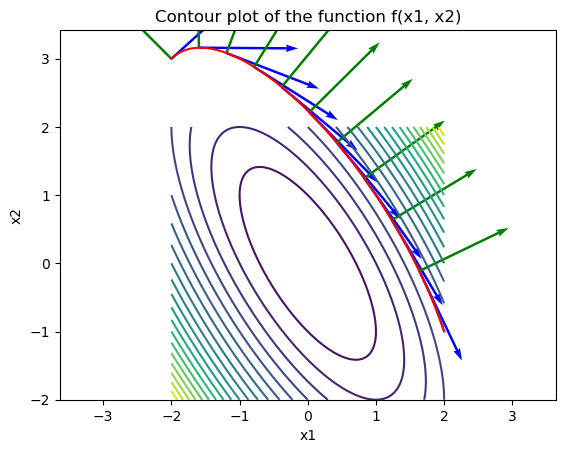

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x1, x2):
    return x1**2 + 0.5*x2**2 + x1*x2

# Define a grid of points
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Plot the function
plt.contour(X1, X2, Z, levels=20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour plot of the function f(x1, x2)')
plt.axis('equal')

# Plot a curve along which f remains constant
t = np.linspace(-2, 2, 100)
x1_curve = t  # Parametric equation for x1
x2_curve = (-t + (5 - (t**2))**0.5)  # Parametric equation for x2
plt.plot(x1_curve, x2_curve, color='red', label='Curve where f is constant')


# Add tangent vectors at some points along the curve
for i in range(0, len(t), 10):
    tangent_vector = np.array([x1_curve[i+1]-x1_curve[i], x2_curve[i+1]-x2_curve[i]])
    gradient_vector = np.array([2*x1_curve[i] + x2_curve[i], x2_curve[i] + x1_curve[i]])
    # Normalize vectors
    tangent_vector /= np.linalg.norm(tangent_vector)
    gradient_vector /= np.linalg.norm(gradient_vector)
    # Plot tangent vector
    plt.quiver(x1_curve[i], x2_curve[i], tangent_vector[0], tangent_vector[1], color='blue', scale=5, width=0.005, label='Tangent vector')
    # Plot gradient vector
    plt.quiver(x1_curve[i], x2_curve[i], gradient_vector[0], gradient_vector[1], color='green', scale=5, width=0.005, label='Gradient vector')


plt.show()


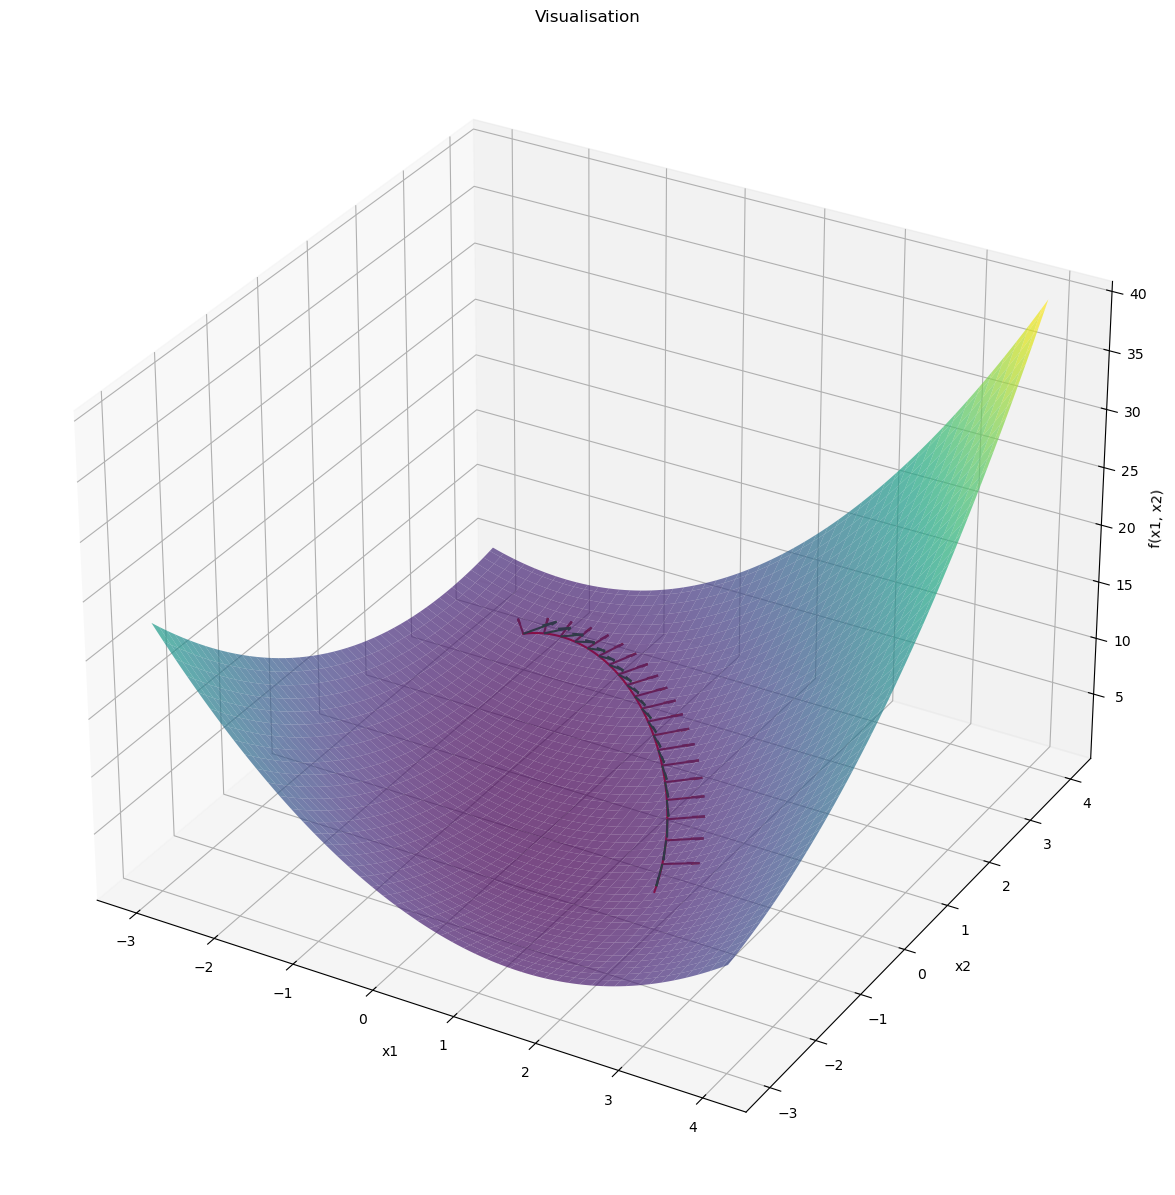

In [129]:
# import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x1, x2):
    return x1**2 + 0.5*x2**2 + x1*x2

# Define the constant value of f
constant_value = 2.5

# Define the parametric equation for the curve where f is constant
t = np.linspace(-2, 2, 10000)
x1_curve = t
x2_curve = (-t + (5 - (t**2))**0.5)
dx2=-1-t/((5-t**2)**0.5)


# Define a grid of points for the 3D surface plot
x1_surface = np.linspace(-3, 4, 100)
x2_surface = np.linspace(-3, 4, 100)
X1_surface, X2_surface = np.meshgrid(x1_surface, x2_surface)
Z_surface = f(X1_surface, X2_surface)

# Plot the 3D surface with adjusted transparency
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1_surface, X2_surface, Z_surface, cmap='viridis', edgecolor='none', alpha=0.7)  # Adjusted transparency
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Visualisation')
# fig.colorbar(surf, ax=ax, shrink=0.5)

# Plot the curve where f is constant
ax.plot(x1_curve, x2_curve, constant_value, color='red', label='Curve where f is constant')

# Plot the gradient vectors on the curve
delta_t = t[1] - t[0]
for i in range(0, len(t), 500):
    x1_point = x1_curve[i]
    x2_point = x2_curve[i]
    gradient_vector = np.array([2*x1_point + x2_point, x2_point + x1_point, constant_value])
    tangent_vectors = np.array([1,dx2[i] , constant_value])
    gradient_vector /= np.linalg.norm(gradient_vector)
    tangent_vectors /= np.linalg.norm(tangent_vectors)
    ax.quiver(x1_point, x2_point, constant_value, gradient_vector[0], gradient_vector[1], gradient_vector[2],
              color='brown', label='Gradient vector',length=0.5)
    ax.quiver(x1_point, x2_point, constant_value, tangent_vectors[0], tangent_vectors[1], tangent_vectors[2],
              color='green', label='Tangent vector',length=0.8)


# Adjust azimuth and elevation angles for better visualization
# ax.view_init(elev=90)
plt.savefig('visualisation.png')
plt.show()


In [133]:
H=np.array([[np.pi**2,np.pi],[np.pi,0]])
H

array([[9.8696044 , 3.14159265],
       [3.14159265, 0.        ]])

In [135]:
eigvals,eigvecs=np.linalg.eig(H)
eigvals

array([10.78474897, -0.91514456])

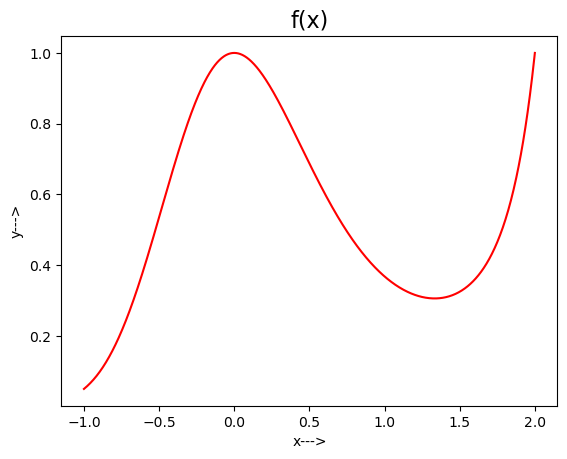

In [149]:
f=lambda x: np.exp(x**3-2*x**2)
x=np.linspace(-1,2,1000)
y=f(x)
pt.plot(x,y,color="red")
pt.xlabel("x--->")
pt.ylabel("y--->")
pt.title("f(x)",fontsize=16)
pt.savefig('f(x).png')

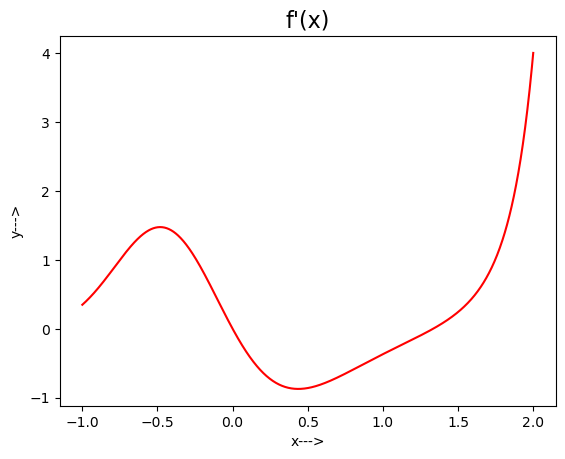

In [150]:
f_dash=lambda x: (3*x**2-4*x)*np.exp(x**3-2*x**2)
x=np.linspace(-1,2,1000)
y=f_dash(x)
pt.plot(x,y,color="red")
pt.xlabel("x--->")
pt.ylabel("y--->")
pt.title("f'(x)",fontsize=16)
pt.savefig('f\'(x).png')